If you want to type along with me, head to [this notebook](https://humboldt.cloudbank.2i2c.cloud/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fbethanyj0%2Fdata111_fa24&branch=main&urlpath=lab%2Ftree%2Fdata111_fa24%2Flectures%2Flec08_live.ipynb) instead. If you prefer follow along by executing the cells, stay in this notebook.

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


**Activity:** How many movies were released by MGM? What about Disney? What about Fox?

In [4]:
num_MGM = ...
num_MGM

Ellipsis

In [5]:
num_Disney = ...
num_Disney

Ellipsis

In [6]:
num_Fox = ...
num_Fox

Ellipsis

Let's explore another way to do this.

In [7]:
studio_distribution = studios.group('Studio')
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [8]:
sum(studio_distribution.column('count'))

200

## Bar Charts ##

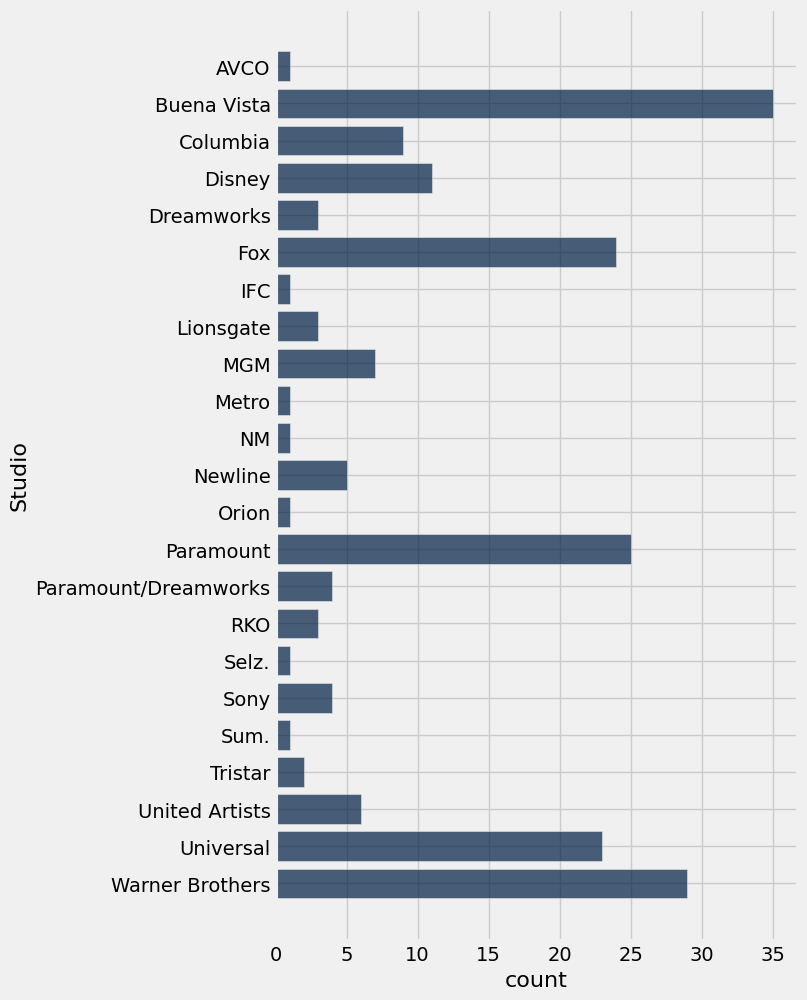

In [9]:
studio_distribution.barh('Studio')

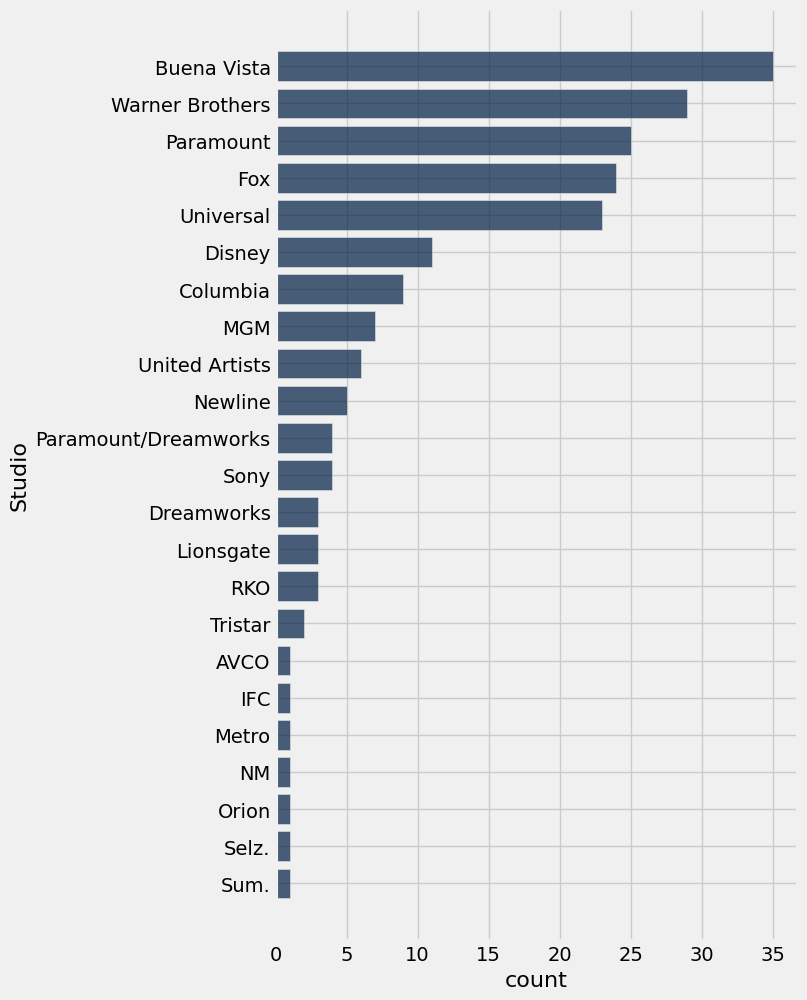

In [10]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [11]:
ages = 2024 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,85
Star Wars,Fox,460998007,1583483200,1977,47
The Sound of Music,Fox,158671368,1266072700,1965,59
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,42
Titanic,Paramount,658672302,1204368000,1997,27
The Ten Commandments,Paramount,65500000,1164590000,1956,68
Jaws,Universal,260000000,1138620700,1975,49
Doctor Zhivago,MGM,111721910,1103564200,1965,59
The Exorcist,Warner Brothers,232906145,983226600,1973,51
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,87


In [12]:
top_movies.num_rows

200

In [13]:
min(ages), max(ages)

(7, 103)

In [14]:
equal_bins = top_movies.bin('Age', bins = np.arange(0, 111, 10))
equal_bins.show()

bin,Age count
0,18
10,32
20,41
30,27
40,26
50,23
60,16
70,10
80,6
90,0


In [15]:
sum(equal_bins.column('Age count'))

200

In [16]:
my_bins = make_array(0, 10, 20, 25, 40, 57, 60, 103)

In [17]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,18
10,32
20,25
25,43
40,43
57,6
60,33
103,0


In [18]:
sum(binned_data.column('Age count'))

200

**Activity** How many movies in `top_movies` have an age between 60 and 103 (excluding 103)? Does anything seem strange to you?

## Histograms ##

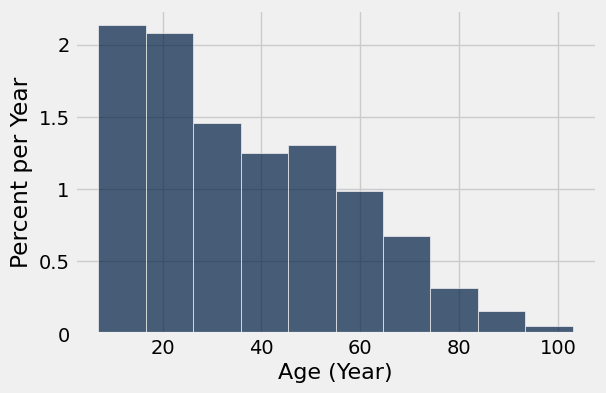

In [19]:
# Let's explore the hist function!
top_movies.hist('Age', unit='Year')

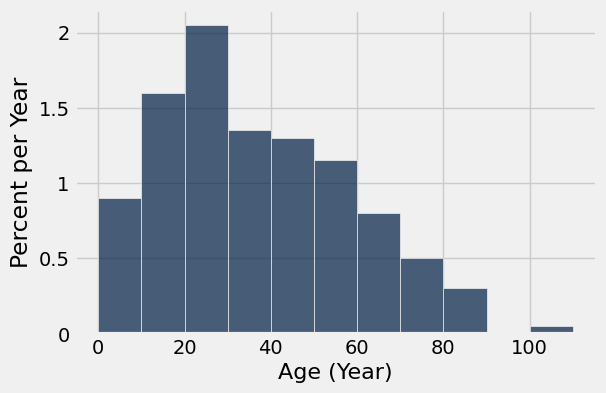

In [20]:
# Let's try equally spaced bins
top_movies.hist('Age', bins = np.arange(0, 111, 10), unit = 'Year')

In [21]:
1.6 * (20 - 10)

16.0

In [22]:
equal_bins

bin,Age count
0,18
10,32
20,41
30,27
40,26
50,23
60,16
70,10
80,6
90,0


In [23]:
total_count = sum(equal_bins.column('Age count'))
32/total_count

0.16

## The vertical axis

In [24]:
my_bins

array([  0,  10,  20,  25,  40,  57,  60, 103])

In [25]:
binned_data

bin,Age count
0,18
10,32
20,25
25,43
40,43
57,6
60,33
103,0


In [26]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)
binned_data

bin,Age count,Percent
0,18,9
10,32,16
20,25,12.5
25,43,21.5
40,43,21.5
57,6,3
60,33,16.5
103,0,0


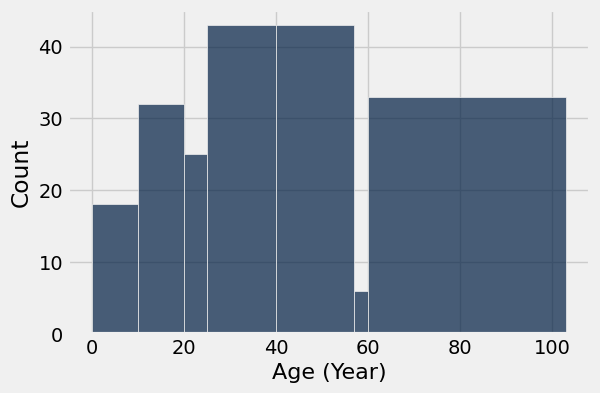

In [28]:
# Let's make this histogram
top_movies.hist('Age', bins = my_bins, unit = 'Year', normed = False)